<a href="https://colab.research.google.com/github/aansheeagrwal/Deep-Learning/blob/main/Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantization is a technique to downsize a trained model so that you can deploy it on EDGE devices. In this tutorial we will,

(1) Train a hand written digits model

(2) Export to a disk and check the size of that model

(3) Use two techniques for quantization (1) post training quantization (3) quantization aware training

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)


10000

In [5]:
X_train[0].shape

(28, 28)

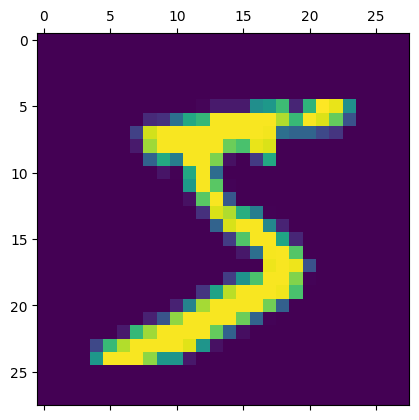

In [6]:
plt.matshow(X_train[0])


In [7]:
y_train[0]

np.uint8(5)

In [8]:
X_train = X_train / 255
X_test = X_test / 255


In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [10]:
X_train_flattened.shape


(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8758 - loss: 0.4450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9643 - loss: 0.1262
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9728 - loss: 0.0906
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9853 - loss: 0.0500


In [13]:
model.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1032


[0.08719521760940552, 0.9747999906539917]

In [21]:
model.export("./saved_model/")


Saved artifact at './saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135932920345040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135932920346000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135932920345424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135932920345808: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [22]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model = converter.convert()

In [23]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()


In [24]:
len(tflite_model)


319960

In [25]:
len(tflite_quant_model)


86016

In [26]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)


In [27]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)


In [29]:
!pip install -q tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [32]:
import tensorflow as tf

# Export your original model to SavedModel format
model.export("saved_model")

# Convert to TFLite with dynamic range quantization
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TFLite model
with open("model_quantized.tflite", "wb") as f:
    f.write(tflite_model)





Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135932920345040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135932920346000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135932920345424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135932920345808: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
X_train_tensor = tf.constant(X_train.tolist(), dtype=tf.string)
y_train_tensor = tf.constant(y_train.tolist(), dtype=tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

q_aware_model.fit(train_ds, epochs=1)


Buffered data was truncated after reaching the output size limit.

In [ ]:
q_aware_model.evaluate(X_test, y_test)


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()


In [ ]:
len(tflite_qaware_model)


In [ ]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)